In [35]:
import scipy
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import sparse
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, mean_squared_error, 
                             classification_report, accuracy_score, 
                             precision_score, recall_score, f1_score, auc, 
                             roc_auc_score, roc_curve, precision_recall_curve)

## Load Vectorizer

In [2]:
# Vectorizer used for training data
vect = pickle.load(open("tfidf_vect.pickle", "rb"))
# vect.vocabulary_

C:\Users\shank\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\shank\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Load Files

In [3]:
# Load sparse mtx
train_tf_idf = sparse.load_npz("train_tf_idf.npz")
test_tf_idf = sparse.load_npz("test_tf_idf.npz")

# Load extra columns
rem_train_feats = pd.read_csv('rem_train_feats.csv')
rem_test_feats = pd.read_csv('rem_test_feats.csv')

# Load labels
y_train = pd.read_csv('y_train.csv').label.values
y_test = pd.read_csv('y_test.csv').label.values

In [4]:
rem_train_feats.head(2)

,quoted_word_count,stopword_count,word_count,weird_caps
0,0,1,3,0
1,0,3,7,0


In [5]:
# Concat the sparse mtx and dataframe together
from scipy.sparse import hstack
X_train = hstack([train_tf_idf, rem_train_feats])
X_test = hstack([test_tf_idf, rem_test_feats])

In [6]:
print(X_train.shape)
print(X_test.shape)

(698414, 50004)
(299321, 50004)


# kNN

#### Weight = 'uniform'

In [ ]:
kNN = []

for i in range(1,9):
  lc = KNeighborsClassifier(n_neighbors=i, n_jobs=2)

  start = time.time()
  print("Model fitting start time...")

  lc.fit(X_train, y_train)
  y_hat = lc.predict(X_test)

  end = time.time()
  print(f'Model fitting time taken: {end - start}s')

  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat)
  accuracy = accuracy_score(y_test, y_hat)
  f1 = f1_score(y_test,y_hat)
  kNN.append([i, accuracy, recall, precision, f1])

perf = np.array(kNN)
perf_df = pd.DataFrame(perf ,columns=['k', 'accuracy', 'recall', 'precision', 'f1'])
perf_df.set_index('k', inplace=True, drop=True)
perf_df

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.lineplot(data=perf_df)
ax.set(xticks=perf_df.index)
ax.set_title("k-NN Performance", fontsize=25)
ax.set_ylabel("Value", fontsize=22)
ax.set_xlabel("k", fontsize=22)

#### Weight = 'distance'

In [ ]:
kNN = []

for i in range(1,9):
  lc = KNeighborsClassifier(n_neighbors=i, n_jobs=2, weights='distance')

  start = time.time()
  print("Model fitting start time...")

  lc.fit(X_train, y_train)
  y_hat = lc.predict(X_test)

  end = time.time()
  print(f'Model fitting time taken: {end - start}s')

  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat)
  accuracy = accuracy_score(y_test, y_hat)
  f1 = f1_score(y_test,y_hat)
  kNN.append([i, accuracy, recall, precision, f1])

perf = np.array(kNN)
perf_df = pd.DataFrame(perf ,columns=['k', 'accuracy', 'recall', 'precision', 'f1'])
perf_df.set_index('k', inplace=True, drop=True)
perf_df

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.lineplot(data=perf_df)
ax.set(xticks=perf_df.index)
ax.set_title("k-NN Performance", fontsize=25)
ax.set_ylabel("Value", fontsize=22)
ax.set_xlabel("k", fontsize=22)

# SVC

In [ ]:
performance = []

for i in range(1,11):
  clf = LinearSVC(random_state=0, tol=1e-5, verbose=1, C=i/10)
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)
  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat)
  accuracy = accuracy_score(y_test, y_hat)
  f1 = f1_score(y_test,y_hat)
  performance.append([i/10, accuracy, recall, precision, f1])

perf = np.array(performance)
perf_df = pd.DataFrame(perf, columns=['C', 'accuracy', 'recall', 'precision', 'f1'])
perf_df.set_index('C', inplace=True, drop=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.lineplot(data=perf_df)
ax.set(xticks=perf_df.index)
ax.set_title("SVC Performance", fontsize=25)
ax.set_ylabel("Value", fontsize=22)
ax.set_xlabel("C", fontsize=22)

# SGD

In [ ]:
performance = []

for i in range(-10,-2):
  lc = SGDClassifier(max_iter=100000, alpha=10**i)
  lc.fit(X_train, y_train)
  y_hat = lc.predict(X_test)
  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat)
  accuracy = accuracy_score(y_test, y_hat)
  f1 = f1_score(y_test,y_hat)
  performance.append([10**i, accuracy, recall, precision, f1])

perf = np.array(performance)
perf_df = pd.DataFrame(perf ,columns=['alpha', 'accuracy', 'recall', 'precision', 'f1'])
perf_df.set_index('alpha', inplace=True, drop=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.lineplot(data=perf_df)
ax.set(xscale='log')
ax.set(xticks=perf_df.index)
ax.set_title("SGD Performance", fontsize=25)
ax.set_ylabel("Value", fontsize=22)
ax.set_xlabel("Regularization", fontsize=22)

# Cross Validation

In [18]:
# 5-Fold Cross Validation
from sklearn.model_selection import cross_validate

clf = LinearSVC(random_state=0, tol=1e-5, verbose=1, C=1.0)

scores = cross_validate(clf, X_train, y_train, n_jobs=2, verbose=1, scoring=('accuracy', 'precision', 'recall', 'f1'), return_estimator=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 20.4min finished


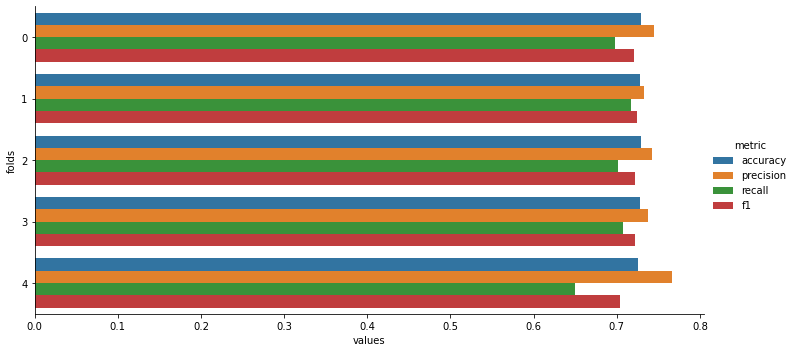

In [19]:
metrics = np.append([np.full(5, 'accuracy'),np.full(5, 'precision')], [np.full(5, 'recall'),np.full(5, 'f1')])
folds = np.append([range(0, 5),range(0, 5)], [range(0, 5),range(0, 5)])
values = np.append([scores['test_accuracy'],scores['test_precision']], [scores['test_recall'],scores['test_f1']])

scores_array = {'values': values, 'folds': folds, 'metric': metrics}
# np.array(scores_array)

scores_df = pd.DataFrame(scores_array)
scores_df

ax = sns.catplot(x='values', y='folds',
                data=scores_df, hue='metric',
                kind="bar", ci=None, aspect=2, orient='h')

# Feature Importance

In [ ]:
lc = LogisticRegression(verbose=1, n_jobs=2, solver='lbfgs')
lc.fit(X_train, y_train)

features = dict(sorted(vect.vocabulary_.items(), key=lambda item: item[1]))
importances = pd.DataFrame(data={
    'Attribute': features.keys(),
    'Importance': lc.coef_[0]
})

# Sort the features by the absolute value of their coefficient
importances["abs_value"] = importances["Importance"].apply(lambda x: abs(x))
importances["colors"] = importances["Importance"].apply(lambda x: "green" if x > 0 else "red")
importances = importances.sort_values("abs_value", ascending=False)

In [ ]:
# Plot features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout(pad=10.0)

sns.barplot(x="Importance",
            y="Attribute",
            ax=ax1,
            data=importances[importances['colors']=='red'].head(20),
            color='red')
sns.barplot(x="Importance",
            y="Attribute",
            ax=ax2,
            data=importances[importances['colors']=='green'].head(20),
            color='green')

ax1.set_title("Top 20 Negative Features", fontsize=22)
ax1.set_ylabel(None)
ax1.set_xlabel("Coefficients", fontsize=20)
ax2.set_title("Top 20 Positive Features", fontsize=22)
ax2.set_ylabel(None)
ax2.set_xlabel("Coefficients", fontsize=20)


# ROC Curves and AUC

In [24]:
lc = LogisticRegression(verbose=1, n_jobs=2, solver='lbfgs')
lc.fit(X_train, y_train)

lr_probs = lc.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   14.8s finished


In [25]:
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

Logistic: ROC AUC=0.758
No Skill: ROC AUC=0.500


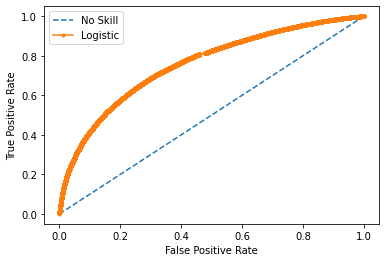

In [29]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Precision Recall Curve

Logistic: f1=0.678 auc=0.761


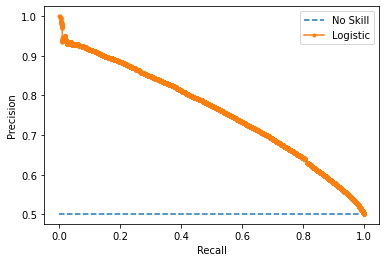

In [36]:
yhat = lc.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Model Comparison

In [7]:
clf_list = [[LogisticRegression(n_jobs=2, solver='lbfgs'), 'logistic regression'],
            [KNeighborsClassifier(n_neighbors=3, n_jobs=2, weights='distance'), 'kNN'],
            [LinearSVC(random_state=0, tol=1e-5, C=0.2), 'SVM'],
            [SGDClassifier(max_iter=1000, n_jobs=2, alpha=0.000001), 'SGD']]

In [8]:
clf_perf = []
clf_y = {}

for clf in clf_list:
  clf[0].fit(X_train, y_train)
  y_hat = clf[0].predict(X_test)
  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat)
  accuracy = accuracy_score(y_test, y_hat)
  f1 = f1_score(y_test,y_hat)
  clf_perf.append([clf[1], 'accuracy', accuracy])
  clf_perf.append([clf[1], 'recall', recall])
  clf_perf.append([clf[1], 'precision', precision])
  clf_perf.append([clf[1], 'f1', f1])
  clf_y[clf[1]] = y_hat

perf_df = pd.DataFrame(clf_perf, columns=['model', 'metric', 'value'])

C:\Users\shank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[(0.0, 1.0)]

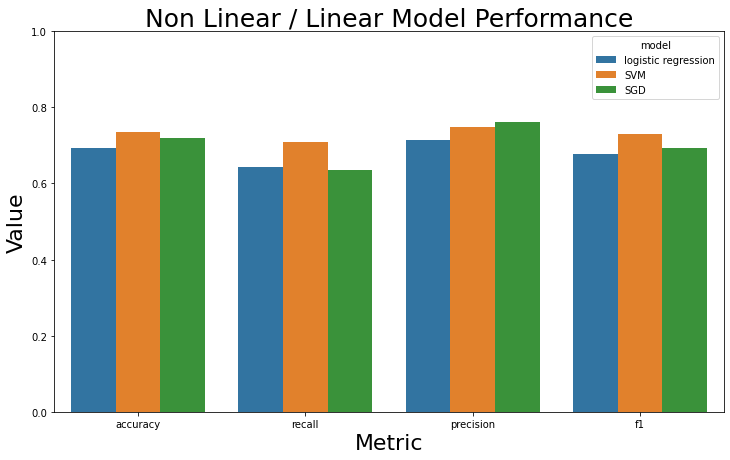

In [9]:
#Plot performance
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x="metric", y="value", hue="model", data=perf_df)
ax.set_title("Non Linear / Linear Model Performance", fontsize=25)
ax.set_ylabel("Value", fontsize=22)
ax.set_xlabel("Metric", fontsize=22)
ax.set(ylim=(0, 1))

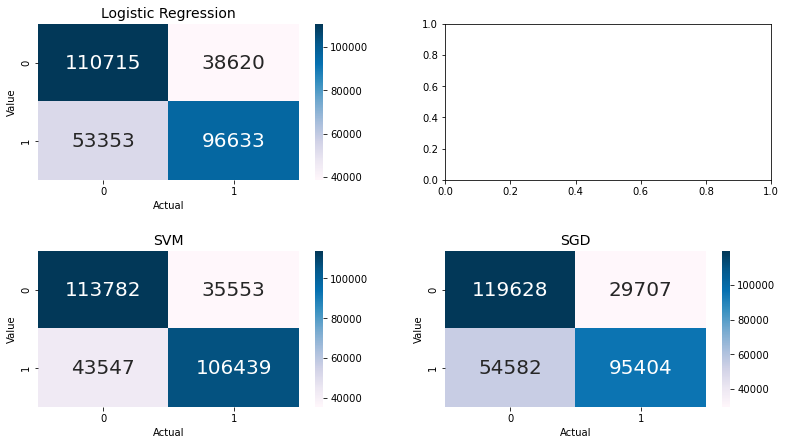

In [10]:
#Plot confussion matrix
fig, ax = plt.subplots(2, 2, figsize=(12, 7))
fig.tight_layout(pad=5.0)

def plot_matrix(i, j, matrix, model):
  sns.heatmap(matrix, ax=ax[i][j], cmap= 'PuBu', annot=True, fmt='g', annot_kws={'size':20})
  ax[i][j].set_title(model, fontsize=14)
  ax[i][j].set_xlabel("Predicted")
  ax[i][j].set_ylabel("Actual")

plot_matrix(0, 0, confusion_matrix(y_test, clf_y['logistic regression']), 'Logistic Regression')
plot_matrix(0, 1, confusion_matrix(y_test, clf_y['kNN']), 'kNN')
plot_matrix(1, 0, confusion_matrix(y_test, clf_y['SVM']), 'SVM')
plot_matrix(1, 1, confusion_matrix(y_test, clf_y['SGD']), 'SGD')

In [11]:
perf_df

,model,metric,value
0,logistic regression,accuracy,0.692728
1,logistic regression,recall,0.644280
2,logistic regression,precision,0.714461
3,logistic regression,f1,0.677558
4,SVM,accuracy,0.735735
5,SVM,recall,0.709660
6,SVM,precision,0.749613
7,SVM,f1,0.729089
8,SGD,accuracy,0.718399
9,SGD,recall,0.636086


# News headlines

In [7]:
X_news = sparse.load_npz("X_test_news.npz")
X_news

<26709x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 175391 stored elements in Compressed Sparse Row format>

In [8]:
y_news = pd.read_csv('y_test_news.csv')['0'].values
y_news

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
train_tf_idf

<698414x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 9524435 stored elements in Compressed Sparse Row format>

In [10]:
clf_list = [[LogisticRegression(n_jobs=2, solver='lbfgs'), 'logistic regression'],
            [KNeighborsClassifier(n_neighbors=3, n_jobs=2, weights='distance'), 'kNN'],
            [LinearSVC(random_state=0, tol=1e-5, C=0.2), 'SVM'],
            [SGDClassifier(max_iter=1000, n_jobs=2, alpha=0.000001), 'SGD']]

In [11]:
clf_perf = []
clf_y = {}

for clf in clf_list:
  clf[0].fit(train_tf_idf, y_train)
  y_hat = clf[0].predict(X_news)
  precision = precision_score(y_news, y_hat)
  recall = recall_score(y_news, y_hat)
  accuracy = accuracy_score(y_news, y_hat)
  f1 = f1_score(y_news,y_hat)
  clf_perf.append([clf[1], 'accuracy', accuracy])
  clf_perf.append([clf[1], 'recall', recall])
  clf_perf.append([clf[1], 'precision', precision])
  clf_perf.append([clf[1], 'f1', f1])
  clf_y[clf[1]] = y_hat

perf_df = pd.DataFrame(clf_perf, columns=['model', 'metric', 'value'])

In [12]:
perf_df

,model,metric,value
0,logistic regression,accuracy,0.523307
1,logistic regression,recall,0.297595
2,logistic regression,precision,0.436890
3,logistic regression,f1,0.354033
4,kNN,accuracy,0.556442
5,kNN,recall,0.023200
6,kNN,precision,0.407796
7,kNN,f1,0.043903
8,SVM,accuracy,0.512674
9,SVM,recall,0.362675


[(0.0, 1.0)]

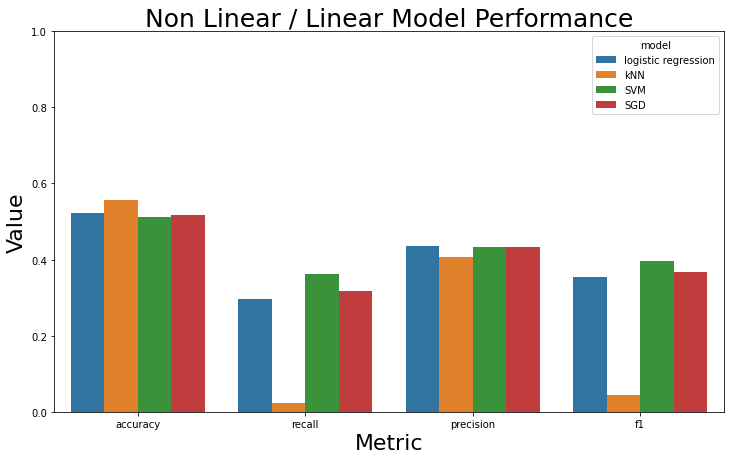

In [19]:
#Plot performance
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x="metric", y="value", hue="model", data=perf_df)
ax.set_title("Non Linear / Linear Model Performance", fontsize=25)
ax.set_ylabel("Value", fontsize=22)
ax.set_xlabel("Metric", fontsize=22)
ax.set(ylim=(0, 1))

In [ ]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y, y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)    
    plt.show()

# evaluation(y_test, y_hat)

Recall:  0.4328462073764788
Accuracy:  0.5176906660676177
Precision:  0.31832139201637666
F1:  0.36685343556473016


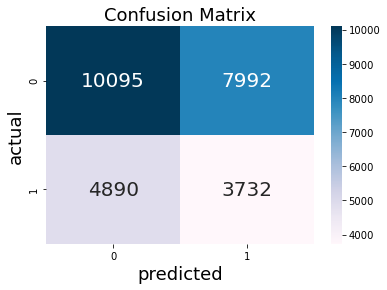

In [18]:
evaluation(clf_y['SGD'], y_news)